# B1: Face Shape Classifier - SVM vs RF

# Import the required libraries

In [1]:
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split

import time
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import Tools as Tool
import warnings
warnings.filterwarnings("ignore")

# Feature Extraction and Data Split

In [4]:
# extract face shape features and labels from images by landmarks
startTime = time.clock()
X_train, X_val, X_test, y_train, y_val, y_test = Tool.data_preprocessingB1(test_size=0.3)

endTime = time.clock()
runTime = endTime - startTime
print('The running time is',runTime,'s')

Get the data from feature extraction for B1.
Split the data into training, validation and test set for B1.
The running time is 208.07161530000002 s


# Train the SVM Model and RF Model

In [ ]:
# Build the SVM model with the optimized params found by GridSearchCV
def svmPredictCV(x_train, y_train, x_val):
    svmclf = svm.SVC()
    param_grid = [{'kernel': ['linear'], 'C': [0.5,1,10,100]},
                  {'kernel': ['rbf'], 'gamma': [0.01], 'C': [1,3,5]},
                  {'kernel': ['poly'], 'degree': [2,3], 'C': [0.5,1,10,100]}
                  ]
    grid_search = GridSearchCV(svmclf, param_grid, cv=3, scoring='accuracy', n_jobs=-1) 
    grid_search.fit(x_train, y_train)
    
    # print result dataframe  
    result = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]), pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])], axis=1)
    print(result) 
    best_accuracy_score = grid_search.best_score_
    best_params = grid_search.best_params_
    print("Best: %f using %s" % (best_accuracy_score, best_params))
    
    # predict with the best classifier
    svmclf_cv = grid_search.best_estimator_
    y_pred = svmclf_cv.predict(x_val)
    
    return y_pred, svmclf_cv  

In [ ]:
# Train the SVM model
startTime = time.clock()
y_pred, svmclf_cv = svmPredictCV(X_train, y_train, X_val)
print(accuracy_score(y_val, y_pred1))

endTime = time.clock()
runTime = endTime - startTime
print('The running time is',runTime,'s')

# Model_ B1: Build SVM model with optimized params
## Build RF model with optimized params tuned manually

In [8]:
# Model_B1: Build the SVM model with the optimized params
def model_B1(x_train, x_val, x_test, y_train):
    B1_svm = svm.SVC(kernel='rbf', C=1, gamma=0.01)
    B1_svm.fit(x_train, y_train)
    y_pred_val = B1_svm.predict(x_val)
    y_pred_test = B1_svm.predict(x_test)
    
    return y_pred_val, y_pred_test, B1_svm 

In [ ]:
# Build Random Forest Model; tune the hyper-parameters manually
def model_B1_rf(x_train, x_val, x_test, y_train):
    B1_rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_features=0.3, max_depth=8)
    B1_rf.fit(X_train, y_train)
    y_pred_val = B1_rf.predict(x_val)
    y_pred_test = B1_rf.predict(x_test)
    
    return y_pred_val, y_pred_test, B1_rf 

In [9]:
# Build and test the model_B1
y_pred_val, y_pred_test, B1_svm = model_B1(X_train, X_val, X_test, y_train)
print('Accuracy on validation set: ' + str(accuracy_score(y_val,y_pred_val)))
print('Accuracy on test set: ' + str(accuracy_score(y_test,y_pred_test)))
print('For validation set:')
print(classification_report(y_val,y_pred_val))
print('For test set:')
print(classification_report(y_test,y_pred_test))

Accuracy on validation set: 0.6914163090128755
Accuracy on test set: 0.6848167539267016
For validation set:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       428
           1       0.60      0.62      0.61       427
           2       0.69      0.65      0.67       513
           3       0.64      0.63      0.63       484
           4       0.79      0.86      0.82       478

    accuracy                           0.69      2330
   macro avg       0.69      0.69      0.69      2330
weighted avg       0.69      0.69      0.69      2330

For test set:
              precision    recall  f1-score   support

           0       0.76      0.75      0.75       361
           1       0.65      0.58      0.61       368
           2       0.67      0.67      0.67       419
           3       0.60      0.65      0.63       393
           4       0.75      0.78      0.77       369

    accuracy                           0.68      1910
   macro 

In [ ]:
# Build and test the RF model
startTime = time.clock()
y_pred_val2, y_pred_test2, B1_rf = model_B1_rf(X_train, X_val, X_test, y_train) 
endTime = time.clock()
runTime = endTime - startTime
print('The running time is',runTime,'s')

print('Accuracy on validation set: ' + str(accuracy_score(y_val,y_pred_val2)))
print('Accuracy on test set: ' + str(accuracy_score(y_test,y_pred_test2)))
print('For validation set:')
print(classification_report(y_val,y_pred_val2))
print('For test set:')
print(classification_report(y_test,y_pred_test2))

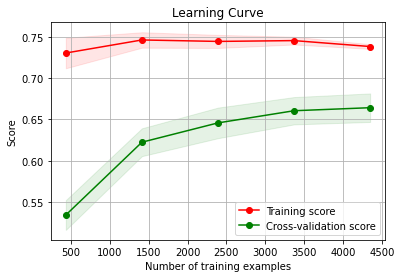

In [10]:
# Plot the learning curve graph
plt = Tool.plot_learning_curve(B1_svm, X_train, y_train)   #For SVM
#plt = plot_learning_curve(B1_rf, X_train, y_train)       #For RF
plt.show()

In [12]:
try:  
  !jupyter nbconvert --to python B1.ipynb
  # python即转化为.py，script即转化为.html
  # file_name.ipynb即当前module的文件名
except:
  pass

[NbConvertApp] Converting notebook B1.ipynb to python
[NbConvertApp] Writing 4380 bytes to B1.py
